In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_csv("bmi.csv")

In [11]:
data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [6]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [7]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [8]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [15]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [16]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [18]:
gender = LabelEncoder()
data['Gender'] = gender.fit_transform(data['Gender'])

In [19]:
data.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [25]:
bins = (-1, 0, 1, 2, 3, 4, 5)
health = ['malnorished', 'underweight', 'fit', 'slightly-overweight', 'overweight', 'extremely overweight']
data['Index'] = pd.cut(data['Index'], bins = bins, labels = health)

TypeError: '<' not supported between instances of 'int' and 'str'

In [26]:
data

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly-overweight
4,1,149,61,slightly-overweight
...,...,...,...,...
495,0,150,153,extremely overweight
496,0,184,121,overweight
497,0,141,136,extremely overweight
498,1,150,95,extremely overweight


In [28]:
data['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

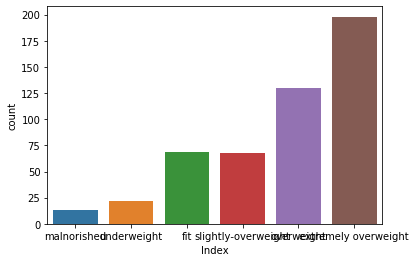

In [30]:
sns.countplot(data['Index'])

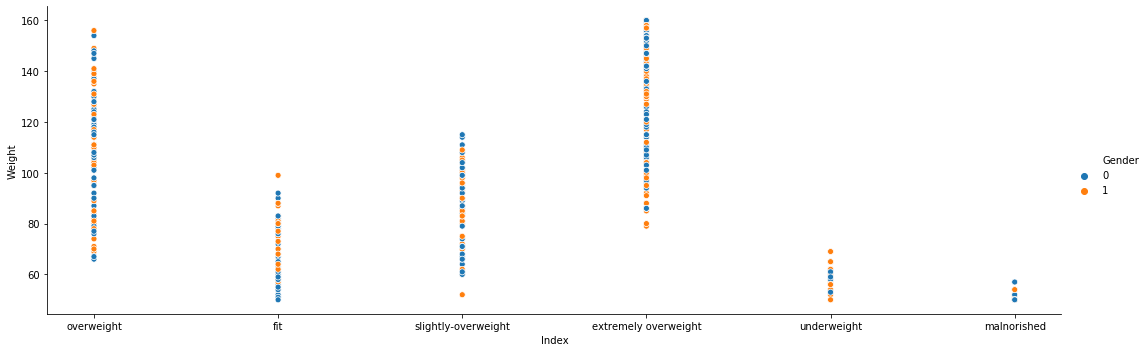

In [42]:
sns.relplot(x = 'Index', y = 'Weight', hue = 'Gender', data = data, aspect = 3)

In [43]:
X = data.drop('Index', axis = 1)
y = data['Index']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [47]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [49]:
print(pred)

['extremely overweight' 'extremely overweight' 'overweight'
 'extremely overweight' 'extremely overweight' 'extremely overweight'
 'slightly-overweight' 'extremely overweight' 'overweight'
 'extremely overweight' 'fit' 'slightly-overweight' 'fit'
 'extremely overweight' 'extremely overweight' 'slightly-overweight'
 'extremely overweight' 'slightly-overweight' 'extremely overweight'
 'extremely overweight' 'extremely overweight' 'slightly-overweight'
 'slightly-overweight' 'overweight' 'fit' 'underweight'
 'extremely overweight' 'overweight' 'overweight' 'slightly-overweight'
 'overweight' 'extremely overweight' 'extremely overweight'
 'extremely overweight' 'overweight' 'underweight' 'extremely overweight'
 'overweight' 'extremely overweight' 'fit' 'extremely overweight'
 'overweight' 'overweight' 'extremely overweight' 'overweight' 'fit'
 'extremely overweight' 'fit' 'extremely overweight'
 'extremely overweight' 'overweight' 'overweight' 'fit'
 'extremely overweight' 'extremely overw

In [51]:
print(classification_report(y_test, pred))

                      precision    recall  f1-score   support

extremely overweight       0.88      0.97      0.92        36
                 fit       0.73      0.80      0.76        10
         malnorished       0.00      0.00      0.00         3
          overweight       0.96      0.78      0.86        32
 slightly-overweight       0.78      0.93      0.85        15
         underweight       0.60      0.75      0.67         4

            accuracy                           0.85       100
           macro avg       0.66      0.71      0.68       100
        weighted avg       0.84      0.85      0.84       100



In [52]:
print(confusion_matrix(y_test, pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [53]:
print(accuracy_score(y_test, pred))

0.85


In [59]:
a = [[0,160,48]]
a = s.transform(a)
clf.predict(a)

array(['fit'], dtype=object)